# gdrive mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# data load

In [0]:
import pandas as pd
import numpy as np
import os
import sys

In [6]:
path = 'drive/My Drive/bigcontest2019/data/'
print(os.listdir(path + 'train'),'\n', 
      os.listdir(path + 'test'),'\n', 
    #   os.listdir(path + '../metrics'),'\n', 
      os.listdir(path + '../scripts'))

['train_payment.csv', 'train_trade.csv', 'train_pledge.csv', 'train_combat.csv', 'train_label.csv', 'train_activity.csv', 'train_merge_bjw.csv'] 
 ['test1_activity.csv', 'test1_combat.csv', 'test2_activity.csv', 'test1_pledge.csv', 'test2_combat.csv', 'test2_trade.csv', 'test1_trade.csv', 'test1_payment.csv', 'test2_payment.csv', 'test2_pledge.csv'] 
 ['data merge', 'explortary data', 'model', 'test1_pred.csv', 'test1_predict.csv']


In [0]:
train_label = pd.read_csv(path + 'train/train_label.csv')
train_activity = pd.read_csv(path + 'train/train_activity.csv')
train_payment = pd.read_csv(path + 'train/train_payment.csv')
train_trade = pd.read_csv(path + 'train/train_trade.csv')
train_pledge = pd.read_csv(path + 'train/train_pledge.csv')
train_combat = pd.read_csv(path + 'train/train_combat.csv')

In [0]:
train_label.head()

,acc_id,survival_time,amount_spent
0,27835,64,0.002559
1,12351,64,0.120154
2,125437,55,0.182593
3,104483,64,0.016241
4,4704,20,0.226396


## activity

In [0]:
train_activity.head()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,75001,397380,aa,1.441844,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,1.10514,0.034006,0.0
1,1,75001,216231,aa,0.283219,2.247978,0.047085,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,-0.013963,0.0
2,1,75711,308769,aa,1.036910,2.956638,0.321821,0.166593,0.003470,1,0.245883,0.247337,0.0,0.0,0.00000,-0.001987,0.0
3,1,72230,387177,aa,0.229384,4.042102,0.099147,0.000000,0.001735,0,0.000000,0.000000,0.0,0.0,0.00000,-0.028884,0.0
4,1,34253,339862,aa,1.088405,0.596802,0.003377,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,0.011777,0.0


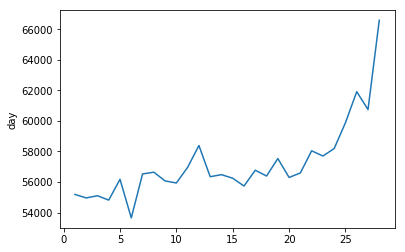

In [0]:
sns.lineplot(x = train_activity['day'].unique() ,y = train_activity['day'].value_counts().sort_index())

In [0]:
train_activity['game_money_change'] = np.abs(train_activity['game_money_change'])
train_activity_group = train_activity.groupby('acc_id').agg({'day':'nunique', 
                                                             'char_id':'nunique', 
                                                             'server':'nunique', 
                                                             'playtime':['sum','mean'], 
                                                             'npc_kill':['sum','mean'], 
                                                             'solo_exp':'sum',
                                                             'party_exp':'sum', 
                                                             'quest_exp':'sum',
                                                             'rich_monster':'sum', 
                                                             'death':'sum', 
                                                             'revive':'sum',
                                                             'exp_recovery':'sum',
                                                             'fishing':'sum',
                                                             'private_shop':'sum',
                                                             'game_money_change':'sum',
                                                             'enchant_count':'sum'})

In [0]:
train_activity_group.head()

day char_id  server  ... private_shop game_money_change enchant_count
       nunique nunique nunique  ...          sum               sum           sum
acc_id                          ...                                             
2           28       1       1  ...    84.900753          4.056205           0.0
5           10       3       1  ...     0.000000          0.328911           0.0
8           28       7       1  ...     0.000000          9.238591           0.0
17          28       4       1  ...     0.000000          6.126588           0.0
20          27       2       4  ...     2.917510          8.536558           0.0

[5 rows x 18 columns]

In [0]:
#  train_activity_group['acc_id'] = train_activity_group.index

In [0]:
train_activity_group.columns = ['activity_'+'_'.join(x) for x in train_activity_group.columns.ravel()]

In [0]:
train_activity_group.columns

Index(['activity_day_nunique', 'activity_char_id_nunique',
       'activity_server_nunique', 'activity_playtime_sum',
       'activity_playtime_mean', 'activity_npc_kill_sum',
       'activity_npc_kill_mean', 'activity_solo_exp_sum',
       'activity_party_exp_sum', 'activity_quest_exp_sum',
       'activity_rich_monster_sum', 'activity_death_sum',
       'activity_revive_sum', 'activity_exp_recovery_sum',
       'activity_fishing_sum', 'activity_private_shop_sum',
       'activity_game_money_change_sum', 'activity_enchant_count_sum'],
      dtype='object')

## payment

1. 아이디 별 지출의 합
2. 아이디 별 지출의 횟수
3. 날짜 별 지출이 다름 ~> day + 변수로 파생변수 생성 가능할 듯

In [0]:
train_payment['amount_spent'].describe()

count    66432.000000
mean         0.668198
std          0.909331
min          0.011735
25%          0.105612
50%          0.352041
75%          0.946990
max         11.733528
Name: amount_spent, dtype: float64

In [0]:
train_payment_group = train_payment.groupby('acc_id').agg({'day':'nunique',
                                                           'amount_spent':'sum'})

In [0]:
# train_payment_group= train_payment_group.rename(columns = {'day':'freq','amount_spent':'sum_spent'})

In [0]:
# train_payment_group['sum_spent'].describe()

count    23726.000000
mean         1.870931
std          2.098117
min          0.011735
25%          0.371990
50%          1.056123
75%          2.461911
max         12.556131
Name: sum_spent, dtype: float64

In [0]:
#  train_payment_group['acc_id']= train_payment_group.index

In [0]:
train_payment_group.columns = ['payment_'+i for i in train_payment_group.columns]

In [0]:
train_payment.groupby('day').sum().sort_index()['amount_spent']

day
1     4822.247108
2     1921.470308
3     1354.159682
4     1159.783973
5     1092.530521
6     1070.363669
7     1015.921343
8     1016.337573
9      866.881715
10     851.925016
11     912.331740
12     845.260410
13     689.787349
14     679.569944
15     755.860290
16     833.227764
17    6475.951710
18    2488.440041
19    1911.747051
20    1551.829438
21    1375.282379
22    1433.871280
23    1619.106008
24    1498.950409
25    1632.780925
26    1474.714730
27    1460.740226
28    1578.637833
Name: amount_spent, dtype: float64

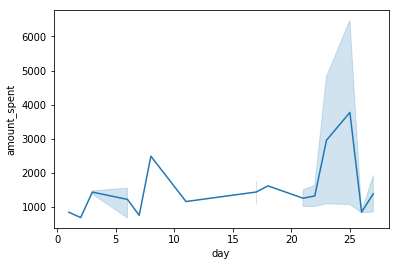

In [0]:
sns.lineplot(x = train_payment['day'],y = train_payment.groupby('day').sum().sort_index()['amount_spent'])

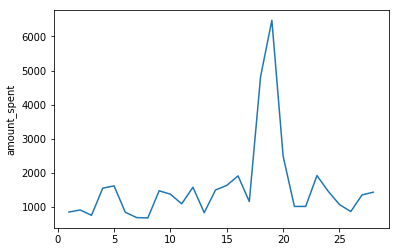

In [0]:
sns.lineplot(x = train_payment['day'].unique(),y = train_payment.groupby('day').sum().sort_index()['amount_spent'])

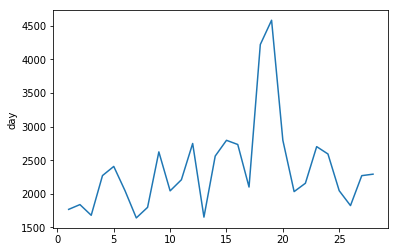

In [0]:
sns.lineplot(x = train_payment['day'].unique(),y = train_payment['day'].value_counts().sort_index())

In [0]:
train_payment_group # merge한 것

,freq,sum_spent
acc_id,,
8,2,1.404644
20,3,0.896531
21,2,2.695461
38,3,6.309749
41,1,0.035204
43,1,3.696431
53,2,0.501072
62,4,4.291380
63,4,1.760205


## trade



- 1주일 40회 이상 수수료 부과(2만, 2만 1천)

In [0]:
train_trade = train_trade.sort_values(by=['day','time','server'])

# trade_exchange = train_trade[train_trade['type']==1] #교환창
# trade_personal = train_trade[train_trade['type']==0] #개인상점

In [0]:
trade_personal['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [0]:
train_trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849325 entries, 312052 to 1787846
Data columns (total 12 columns):
day               int64
time              object
type              int64
server            object
source_acc_id     int64
source_char_id    int64
target_acc_id     int64
target_char_id    int64
item_type         object
item_amount       float64
item_price        float64
week              object
dtypes: float64(2), int64(6), object(4)
memory usage: 183.4+ MB


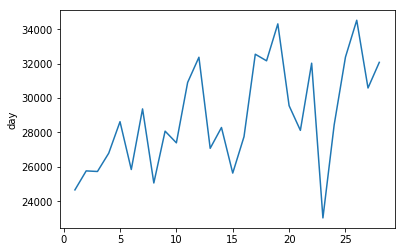

In [0]:
sns.lineplot(x = trade_personal['day'].unique(), y=trade_personal['day'].value_counts().sort_index())

### 전문 판매자 계정 
기간 별 - 일주일에 40회 이상 판매시

판매자 계정이라고 판별할 수 있다.

(40회까지 2만 아데나,
이후 1회 거래시마다 1000아데나씩 추가)

In [0]:
train_trade['week'] = ['1st'if i < 8 else '2nd' if i< 15 else '3rd' if i<22 else '4nd' for i in train_trade['day']]

In [0]:
train_trade['week'].value_counts()

4nd    482761
3rd    481621
1st    445892
2nd    439051
Name: week, dtype: int64

In [0]:
personal_trade_per_week = train_trade[train_trade['type']==0].groupby(['source_acc_id','week'])['day'].count().unstack().fillna(0)

In [0]:
trader = personal_trade_per_week[personal_trade_per_week > 40].dropna().copy() #수수료 물어내는 사람!!

In [0]:
# personal_trade_per_week[personal_trade_per_week > 40].fillna(0)
trader

week,1st,2nd,3rd,4nd
source_acc_id,,,,
137,66.0,56.0,60.0,68.0
216,60.0,62.0,76.0,47.0
344,208.0,160.0,131.0,161.0
481,47.0,65.0,55.0,57.0
527,165.0,142.0,131.0,49.0
574,51.0,60.0,64.0,73.0
1463,51.0,45.0,45.0,53.0
1516,49.0,52.0,60.0,50.0
1599,104.0,106.0,161.0,245.0


In [0]:
trader -= 40 #left join 할 것 (seller와!!)

In [0]:
trader.index

Int64Index([   137,    216,    344,    481,    527,    574,   1463,   1516,
              1599,   1732,
            ...
            129456, 129675, 129754, 129896, 130035, 130142, 130157, 130201,
            130283, 130416],
           dtype='int64', name='source_acc_id', length=678)

In [0]:
trader.columns = ['trader_'+i for i in trader.columns]

In [0]:
# personal_trade_per_week[personal_trade_per_week.index == 130157] #이친구를 자세히 봐보자!!

week,1st,2nd,3rd,4nd
source_acc_id,,,,
130157,110.0,150.0,116.0,77.0


In [0]:
# train_activity[train_activity['acc_id'] == 130157] #활동이 1도 없음... 판매계정!!

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
10717,1,130157,297885,af,2.705797,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.454801,0.054713,0.0
65620,2,130157,297885,af,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.161835,0.202623,0.0
120542,3,130157,297885,af,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.187387,0.781930,0.0
175503,4,130157,297885,af,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.121459,-0.535489,0.0
230684,5,130157,297885,af,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.155437,0.745887,0.0
286405,6,130157,297885,af,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.143656,-1.213159,0.0
340690,7,130157,297885,af,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.155866,-0.045549,0.0
397102,8,130157,297885,af,2.347677,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.142831,0.451071,0.0
453624,9,130157,297885,af,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.135815,-0.093669,0.0
509506,10,130157,297885,af,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.134644,0.035885,0.0


In [0]:
train_label[train_label['acc_id']== 130157]

,acc_id,survival_time,amount_spent
20189,130157,64,0.0


In [0]:
idx = [idx for idx,i in enumerate(train_label['acc_id']) if i in list(trader.index) ]

In [0]:
trader_label = train_label.iloc[idx]

In [0]:
trader_label

,acc_id,survival_time,amount_spent
520,29146,64,0.000000
521,5197,64,0.000000
536,113168,64,0.000000
1154,130142,64,0.015224
1159,95228,64,0.000000
1210,67302,64,0.036092
1226,15730,64,0.093610
1227,57544,15,0.207136
1368,49552,64,0.000000
1369,19474,64,0.000000


In [0]:
trader_label[trader_label['survival_time']<64]

,acc_id,survival_time,amount_spent
1227,57544,15,0.207136
1718,108103,21,0.046395
2352,95839,16,0.659797
3031,81509,51,0.057321
6147,34540,18,0.045181
6386,64467,9,0.000000
16504,120127,7,0.000000
16884,103184,16,0.000000
17856,124930,21,0.218751
20988,70546,10,0.018046


In [0]:
len(train_activity['char_id'].unique())

150960

In [0]:
train_activity.sort_values(['day','acc_id']).head(10)

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
37347,1,2,233598,au,2.703457,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,2.462447,1.024810,0.0
24570,1,8,207949,ao,0.002341,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
24571,1,8,305373,ao,0.002341,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
24572,1,8,320423,ao,0.058516,0.053732,0.183537,0.000000,0.277636,0,0.0,0.0,0.0,0.0,0.000000,-0.000059,0.0
24573,1,8,43437,ao,0.002341,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
24574,1,8,71899,ao,0.007022,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
24575,1,8,257304,ao,0.039791,0.000000,0.000000,0.000000,0.003470,0,0.0,0.0,0.0,0.0,0.000000,0.005531,0.0
24576,1,8,126227,ao,0.351098,3.040447,8.420611,0.000000,0.094018,0,0.0,0.0,0.0,0.0,0.000000,0.727112,0.0
27644,1,17,135044,aq,0.327692,0.180798,0.006721,0.010488,0.000000,0,0.0,0.0,0.0,0.0,0.000000,-0.005380,0.0
12324,1,20,149667,ag,0.285560,3.840013,0.028034,0.000000,0.000434,0,0.0,0.0,0.0,0.0,0.000000,-0.041201,0.0


### 판매자 테이블 정의


In [0]:
grouped_trade_seller = train_trade.groupby('source_acc_id').agg({'day':'count', 
                                         'type':['nunique','count','sum'], # 거래의 종류들을 파악하기 위해서 -> nuique = 2이면 두 종류의 거래 모두 진행 / count 
                                         'server':'nunique', 
                                         'source_char_id':'nunique', # 몇개의 캐릭터 운용하는지
                                         'target_acc_id':'nunique', 
                                         'target_char_id':'nunique',
                                         'item_type':'nunique', 
                                         'item_amount':'sum',
                                         'item_price':'sum'})

In [0]:
# grouped_trade_seller.columns = ['sell_freq', 'sell_type_nunique','sell_type_personal', 'sell_type_exchange','sell_server','sell_char_count','sell_buyer_id','sell_buyer_char','sell_item_category','sell_item_amount','sell_item_price']

In [0]:
grouped_trade_seller.columns = ['trade_seller_'+'_'.join(x) for x in grouped_trade_seller.columns.ravel()]
grouped_trade_seller.columns

Index(['trade_seller_day_count', 'trade_seller_type_nunique',
       'trade_seller_type_count', 'trade_seller_type_sum',
       'trade_seller_server_nunique', 'trade_seller_source_char_id_nunique',
       'trade_seller_target_acc_id_nunique',
       'trade_seller_target_char_id_nunique', 'trade_seller_item_type_nunique',
       'trade_seller_item_amount_sum', 'trade_seller_item_price_sum'],
      dtype='object')

In [0]:
grouped_trade_seller['trade_seller_type_count'] -= grouped_trade_seller['trade_seller_type_sum']

In [0]:
grouped_trade_seller = grouped_trade_seller.rename(columns = {'trade_seller_type_count':'trade_seller_type_personal','trade_seller_type_sum':'trade_seller_type_exchange'})

In [0]:
# grouped_trade_seller['sell_type_personal'] = grouped_trade_seller['sell_type_personal']-grouped_trade_seller['sell_type_exchange']

In [0]:
grouped_trade_seller.head()

,trade_seller_day_count,trade_seller_type_nunique,trade_seller_type_personal,trade_seller_type_exchange,trade_seller_server_nunique,trade_seller_source_char_id_nunique,trade_seller_target_acc_id_nunique,trade_seller_target_char_id_nunique,trade_seller_item_type_nunique,trade_seller_item_amount_sum,trade_seller_item_price_sum
source_acc_id,,,,,,,,,,,
2,35,2,34,1,1,1,30,30,3,0.311620,10.086512
6,20,1,20,0,1,1,13,13,1,0.000047,0.213249
8,7,1,0,7,1,3,4,4,3,0.093602,0.000000
13,2,1,0,2,1,1,1,1,1,0.000303,0.000000
17,33,1,0,33,1,2,2,2,5,4.197842,0.000000


In [0]:
len(grouped_trade_seller)

60645

### 구매자 테이블 정의

In [0]:
grouped_trade_buyer = train_trade.groupby('target_acc_id').agg({'day':'count', 
                                         'type':['nunique','count','sum'], # 거래의 종류들을 파악하기 위해서 -> nuique = 2이면 두 종류의 거래 모두 진행 / count 
                                         'server':'nunique', 
                                        'target_char_id':'nunique',
                                         'source_acc_id':'nunique', 
                                         'source_char_id':'nunique', # 몇개의 캐릭터 운용하는지
                                         'item_type':'nunique', 
                                         'item_amount':'sum',
                                          'item_price':'sum'})

In [0]:
grouped_trade_buyer.columns = ['trade_buyer_'+'_'.join(x) for x in grouped_trade_buyer.columns.ravel()]

In [0]:
grouped_trade_buyer.columns

Index(['trade_buyer_day_count', 'trade_buyer_type_nunique',
       'trade_buyer_type_count', 'trade_buyer_type_sum',
       'trade_buyer_server_nunique', 'trade_buyer_target_char_id_nunique',
       'trade_buyer_source_acc_id_nunique',
       'trade_buyer_source_char_id_nunique', 'trade_buyer_item_type_nunique',
       'trade_buyer_item_amount_sum', 'trade_buyer_item_price_sum'],
      dtype='object')

In [0]:
# grouped_trade_buyer.columns = ['buy_freq', 'buy_type_nunique','buy_type_personal', 'buy_type_exchange','buy_server','buy_char_count','buy_seller_id','buy_seller_char','buy_item_category','buy_item_amount','buy_item_price']

In [0]:
grouped_trade_buyer['trade_buyer_type_count'] -= grouped_trade_buyer['trade_buyer_type_sum']


In [0]:
grouped_trade_buyer = grouped_trade_buyer.rename(columns = {'trade_buyer_type_count':'trade_buyer_type_personal','trade_buyer_type_sum':'trade_buyer_type_exchange'})

In [0]:
# grouped_trade_buyer['buy_type_personal'] = grouped_trade_buyer['buy_type_personal']-grouped_trade_buyer['buy_type_exchange']

In [0]:
grouped_trade_buyer.head()

,trade_buyer_day_count,trade_buyer_type_nunique,trade_buyer_type_personal,trade_buyer_type_exchange,trade_buyer_server_nunique,trade_buyer_target_char_id_nunique,trade_buyer_source_acc_id_nunique,trade_buyer_source_char_id_nunique,trade_buyer_item_type_nunique,trade_buyer_item_amount_sum,trade_buyer_item_price_sum
target_acc_id,,,,,,,,,,,
2,1,1,1,0,1,1,1,1,1,4.793968e-08,0.013612
3,1,1,1,0,1,1,1,1,1,2.396984e-08,0.096329
4,1,1,1,0,1,1,1,1,1,2.396984e-08,0.004666
5,10,1,10,0,1,1,2,2,1,2.014665e-04,0.432697
6,1,1,0,1,1,1,1,1,1,7.190952e-05,0.000000


In [0]:
len(grouped_trade_buyer)

72300

### trade merge

In [0]:
train_trade_group = pd.concat([grouped_trade_seller, grouped_trade_buyer], axis=1)

In [0]:
# trade_group = trade_group.fillna('0')

In [0]:
train_trade_group.head()

,trade_seller_day_count,trade_seller_type_nunique,trade_seller_type_personal,trade_seller_type_exchange,trade_seller_server_nunique,trade_seller_source_char_id_nunique,trade_seller_target_acc_id_nunique,trade_seller_target_char_id_nunique,trade_seller_item_type_nunique,trade_seller_item_amount_sum,trade_seller_item_price_sum,trade_buyer_day_count,trade_buyer_type_nunique,trade_buyer_type_personal,trade_buyer_type_exchange,trade_buyer_server_nunique,trade_buyer_target_char_id_nunique,trade_buyer_source_acc_id_nunique,trade_buyer_source_char_id_nunique,trade_buyer_item_type_nunique,trade_buyer_item_amount_sum,trade_buyer_item_price_sum
2,35.0,2.0,34.0,1.0,1.0,1.0,30.0,30.0,3.0,0.311620,10.086512,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.793968e-08,0.013612
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.396984e-08,0.096329
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.396984e-08,0.004666
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,10.0,0.0,1.0,1.0,2.0,2.0,1.0,2.014665e-04,0.432697
6,20.0,1.0,20.0,0.0,1.0,1.0,13.0,13.0,1.0,0.000047,0.213249,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,7.190952e-05,0.000000


In [0]:
train_trade_group.isna().sum()

day_count                 19516
type_nunique              19516
type_personal             19516
type_exchange             19516
server_nunique            19516
source_char_id_nunique    19516
target_acc_id_nunique     19516
target_char_id_nunique    19516
item_type_nunique         19516
item_amount_sum           19516
item_price_sum            19516
day_count                  7861
type_nunique               7861
type_personal              7861
type_exchange              7861
server_nunique             7861
target_char_id_nunique     7861
source_acc_id_nunique      7861
source_char_id_nunique     7861
item_type_nunique          7861
item_amount_sum            7861
item_price_sum             7861
dtype: int64

In [0]:
# train_trade_group['acc_id'] = train_trade_group.index

In [0]:
train_trade_group.head()

,sell_freq,sell_type_nunique,sell_type_personal,sell_type_exchange,sell_server,sell_char_count,sell_buyer_id,sell_buyer_char,sell_item_category,sell_item_amount,sell_item_price,buy_freq,buy_type_nunique,buy_type_personal,buy_type_exchange,buy_server,buy_char_count,buy_seller_id,buy_seller_char,buy_item_category,buy_item_amount,buy_item_price,acc_id
2,35.0,2.0,34.0,1.0,1.0,1.0,30.0,30.0,3.0,0.311620,10.086512,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.793968e-08,0.013612,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.396984e-08,0.096329,3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.396984e-08,0.004666,4
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,10.0,0.0,1.0,1.0,2.0,2.0,1.0,2.014665e-04,0.432697,5
6,20.0,1.0,20.0,0.0,1.0,1.0,13.0,13.0,1.0,0.000047,0.213249,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,7.190952e-05,0.000000,6


## Pledge

In [0]:
train_pledge['week'] = ['1st'if i < 8 else '2nd' if i< 15 else '3rd' if i<22 else '4nd' for i in train_pledge['day']]

In [0]:
train_pledge.head()

,day,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
0,1,106660,345122,aa,381,0.036089,0.036089,0.0,0.0,0.0,0.0,0.000000,0.007078,0.027568,0.000000
1,1,46383,161773,aa,10892,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006139
2,1,18495,321373,aa,13705,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000347
3,1,118293,366707,aa,2982,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001042
4,1,50421,158063,aa,27104,0.216536,0.072179,0.0,0.0,0.0,0.0,0.098883,0.056626,0.083978,0.000000


In [0]:
train_pledge['week'].value_counts()

4nd    287853
3rd    270420
2nd    268121
1st    256990
Name: week, dtype: int64

In [0]:
train_pledge.groupby(['week']).sum().loc[:,['play_char_cnt',
                                                 'combat_char_cnt',
                                                 'pledge_combat_cnt','random_attacker_cnt',
                                                 'random_defender_cnt','same_pledge_cnt',
                                                 'temp_cnt','etc_cnt','combat_play_time',
                                                 'non_combat_play_time']]

,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
week,,,,,,,,,,
1st,333808.051065,126532.762575,56993.050664,77223.302403,64694.015803,170216.640502,153154.217543,138524.440514,301271.364434,9962.175454
2nd,354318.549574,143258.177181,77345.701065,77504.234009,69202.564558,54366.184097,168354.519653,183934.400266,311334.325517,9906.542849
3rd,346651.229321,131364.003667,64892.831076,71049.810983,73958.254089,39246.761585,166942.370848,139590.554675,297824.058546,9217.453814
4nd,356312.448379,138381.896619,69792.557105,75828.875909,72939.933949,49236.195311,188039.464631,155847.298578,321024.210580,11251.879347


In [0]:
train_pledge_group = train_pledge.groupby('acc_id').agg(
    {
        'day': 'nunique',                   # 날짜
        'char_id': 'nunique',               # 캐릭터 아이디
        'server' : 'nunique',               # 캐릭터 서버
        'pledge_id' : 'nunique',            # 혈맹 아이디
        'play_char_cnt' : 'sum',        # 게임에 접속한 혈맹원 수
        'combat_char_cnt' : 'sum',      # 전투에 참여한 혈맹원 수
        'pledge_combat_cnt': 'sum',     # 혈맹 간 전투 횟수의 합
        'random_attacker_cnt' : 'sum',  # 혈맹원 중 막피 전투를 행한 횟수의 합
        'random_defender_cnt': 'sum',   # 혈맹원 중 막피로부터 피해를 받은 횟수의 합
        'same_pledge_cnt': 'sum',       # 동일 혈맹원 간 전투 횟수의 합
        'temp_cnt' : 'sum',             # 혈맹원들의 단발성 전투 횟수의 합
        'etc_cnt' : 'sum',              # 혈맹원들의 기타 전투 횟수의 합
        'combat_play_time': 'sum',      # 혈맹의 전투 캐릭터들의 플레이 시간의 합
        'non_combat_play_time' : 'sum' # 혈맹의 非전투 캐릭터 플레이 시간의 합
    })

In [0]:
train_pledge_group.columns = ['pledge_'+i for i in train_pledge_group.columns]

In [0]:
train_pledge_group.head()

,pledge_day,pledge_char_id,pledge_server,pledge_pledge_id,pledge_play_char_cnt,pledge_combat_char_cnt,pledge_pledge_combat_cnt,pledge_random_attacker_cnt,pledge_random_defender_cnt,pledge_same_pledge_cnt,pledge_temp_cnt,pledge_etc_cnt,pledge_combat_play_time,pledge_non_combat_play_time
acc_id,,,,,,,,,,,,,,
5,10,3,1,3,5.557755,1.587930,0.000000,1.936569,0.929907,0.000000,2.570959,0.814001,5.097608,0.004402
8,28,7,1,4,201.306223,58.031626,2.717332,33.631748,21.745527,29.441536,92.455650,61.354404,136.879854,0.033823
17,28,2,1,1,71.312495,21.689681,0.486279,9.230979,10.872764,1.591434,36.784494,12.514373,65.693573,0.000000
20,27,1,4,2,54.891855,25.515149,7.964404,11.974452,6.580883,11.140041,28.379435,44.409036,66.451919,0.000000
21,26,1,2,1,1.660109,0.360893,0.000000,0.000000,0.071531,0.000000,0.791064,0.035391,0.501896,0.875103


## combat

In [0]:
train_combat_group = train_combat.groupby('acc_id').agg(
    {
        'day': 'nunique',              # 날짜
        'char_id': 'nunique',          # 캐릭터 아이디
        'server' : 'nunique',          # 캐릭터 서버
        'class' : 'nunique',           # 직업
        'pledge_cnt' : 'sum',          # 혈맹간 전투에 참여한 횟수
        'random_attacker_cnt' : 'sum', # 본인이 막피 공격을 행한 횟수
        'random_defender_cnt' : 'sum', # 막피 공격자로부터 공격을 받은 횟수
        'temp_cnt' : 'sum',            # 단발성 전투 횟수
        'same_pledge_cnt' : 'sum',     # 동일 혈맹원 간의 전투 횟수
        'etc_cnt' : 'sum',             # 기타 전투 횟수
        'num_opponent' : 'sum'         # 전투 상대 캐릭터수
    })

In [0]:
train_combat_group.columns = ['combat_'+i for i in train_combat_group.columns]

In [0]:
# print('<combat>')
# train_combat_group.columns
# print('\n\n<pledge>')
# train_pledge_group.columns

<combat>


Index(['day', 'char_id', 'server', 'class', 'pledge_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
       'same_pledge_cnt', 'etc_cnt', 'num_opponent'],
      dtype='object')



<pledge>


Index(['day', 'char_id', 'server', 'pledge_id', 'play_char_cnt',
       'combat_char_cnt', 'pledge_combat_cnt', 'random_attacker_cnt',
       'random_defender_cnt', 'same_pledge_cnt', 'temp_cnt', 'etc_cnt',
       'combat_play_time', 'non_combat_play_time'],
      dtype='object')

In [0]:
# # 변수이름이 동일... 이건 rename 필요필요
# rename_lst = [i for i in train_combat_group.columns for j in train_pledge_group.columns if i == j]

# combat_rename = {}
# pledge_rename = {}

# for colname in rename_lst:
#     combat_rename[colname] = 'combat_'+colname
#     pledge_rename[colname] = 'pledge_'+colname

['day',
 'char_id',
 'server',
 'random_attacker_cnt',
 'random_defender_cnt',
 'temp_cnt',
 'same_pledge_cnt',
 'etc_cnt']

In [0]:
# train_combat_group= train_combat_group.rename(columns = combat_rename)
# train_pledge_group= train_pledge_group.rename(columns = pledge_rename)

# total merge

In [0]:
def merge_all_df(df, by ,*args):
    '''
    df : 기준이 되는 데이터 프레임(left join)
    by : 기준이 되는 열 (df 외 타 args(df) 에도 해당 열 존재하게 생성할 것)
    *args : 가변인자 (데이터 프레임을 원하는 만큼 집어넣으면 된다.)
    '''    
    for arg in args:
        if by not in arg.columns:
            arg[by] = arg.index
            del arg.index.name
        df = pd.merge(df, arg, how='left',on= by)
    return df

In [0]:
'acc_id' in train_trade_group.columns
'acc_id' in train_activity_group.columns
'acc_id' in train_combat_group.columns
'acc_id' in train_payment_group.columns
'acc_id' in train_pledge_group.columns
'acc_id' in train_label.columns

False

False

False

False

False

True

In [0]:
train = merge_all_df(train_label,'acc_id',train_trade_group,train_payment_group,train_activity_group,train_combat_group,train_pledge_group)

In [0]:
train = train.fillna(0)

In [0]:
len(train)
print()
len(train.columns)

40000

70

In [0]:
from google.colab import files

train.to_csv('train_merge_bjw.csv')

In [0]:
!cp train_merge_bjw.csv drive/My\ Drive/bigcontest2019/data/train/